# Gemstone Classification Using Deep Learning

[AITS](https://discord.gg/x6xn39u)

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=42986ff984931c8746fb7b24bb0e9d70df9e646c21eff41227391806213c54b9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Import modules

In [2]:
from sklearn.metrics import classification_report, accuracy_score, log_loss
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np
import wget
import cv2
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [3]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/gemstones.zip"

--2021-09-01 22:24:49--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/gemstones.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.72
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24678423 (24M) [application/x-zip-compressed]
Saving to: ‘gemstones.zip’

gemstones.zip       100%[===================>]  23.54M  14.8MB/s    in 1.6s    

2021-09-01 22:24:51 (14.8 MB/s) - ‘gemstones.zip’ saved [24678423/24678423]



In [4]:
!ls

gemstones.zip  sample_data


In [5]:
!unzip -qo gemstones.zip

In [6]:
!ls gemstones

test  train


In [7]:
directory = 'gemstones/train/'

names = []
for file in os.listdir(directory):
  names += [file]

print(names)
print(len(names))

['Emerald', 'Quartz Beer', 'Spinel', 'Diamond', 'Danburite', 'Prehnite', 'Chrome Diopside', 'Sunstone', 'Chrysoberyl', 'Hessonite', 'Andradite', 'Onyx Red', 'Carnelian', 'Variscite', 'Ruby', 'Ametrine', 'Chrysoprase', 'Morganite', 'Aventurine Green', 'Spodumene', 'Chalcedony', 'Cats Eye', 'Serpentine', 'Iolite', 'Sapphire Yellow', 'Aventurine Yellow', 'Dumortierite', 'Zoisite', 'Alexandrite', 'Peridot', 'Andalusite', 'Rhodochrosite', 'Blue Lace Agate', 'Lapis Lazuli', 'Quartz Rose', 'Quartz Smoky', 'Larimar', 'Topaz', 'Sapphire Pink', 'Tigers Eye']
40


## Map and display all categories in dataset

In [8]:
gems_map = dict(zip(names, [t for t in range(len(names))]))
print(gems_map)
r_gems_map = dict(zip([t for t in range(len(names))], names))

{'Emerald': 0, 'Quartz Beer': 1, 'Spinel': 2, 'Diamond': 3, 'Danburite': 4, 'Prehnite': 5, 'Chrome Diopside': 6, 'Sunstone': 7, 'Chrysoberyl': 8, 'Hessonite': 9, 'Andradite': 10, 'Onyx Red': 11, 'Carnelian': 12, 'Variscite': 13, 'Ruby': 14, 'Ametrine': 15, 'Chrysoprase': 16, 'Morganite': 17, 'Aventurine Green': 18, 'Spodumene': 19, 'Chalcedony': 20, 'Cats Eye': 21, 'Serpentine': 22, 'Iolite': 23, 'Sapphire Yellow': 24, 'Aventurine Yellow': 25, 'Dumortierite': 26, 'Zoisite': 27, 'Alexandrite': 28, 'Peridot': 29, 'Andalusite': 30, 'Rhodochrosite': 31, 'Blue Lace Agate': 32, 'Lapis Lazuli': 33, 'Quartz Rose': 34, 'Quartz Smoky': 35, 'Larimar': 36, 'Topaz': 37, 'Sapphire Pink': 38, 'Tigers Eye': 39}


In [9]:
img_width, img_height = 100, 100

## Build helpful functions

In [10]:
## Function to read images and labels from training data

def read_images():
  images, labels = [], []
  for root, dirs, files in os.walk('gemstones/train/'):
    f = os.path.basename(root)
    for file in files:
      labels.append(f)
      try:
        image = cv2.imread(root + '/' + file)
        image = cv2.resize(image, (int(img_width), int(img_height)))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
      except Exception as e:
        print(e)

  images = np.array(images)
  return (images, labels)

In [11]:
## Function which convers string labels into numbers

def get_class_index(labels):
  for i, n in enumerate(labels):
    for j, k in enumerate(names):
      if n == k:
        labels[i] = j
  
  labels = np.array(labels)
  return labels

## Read images and labels from training set

In [12]:
train_img, train_label = read_images()
train_label = get_class_index(train_label)

print("Shape of train images: {}".format(train_img.shape))
print("Shape of train labels: {}".format(train_label.shape))

Shape of train images: (1303, 100, 100, 3)
Shape of train labels: (1303,)


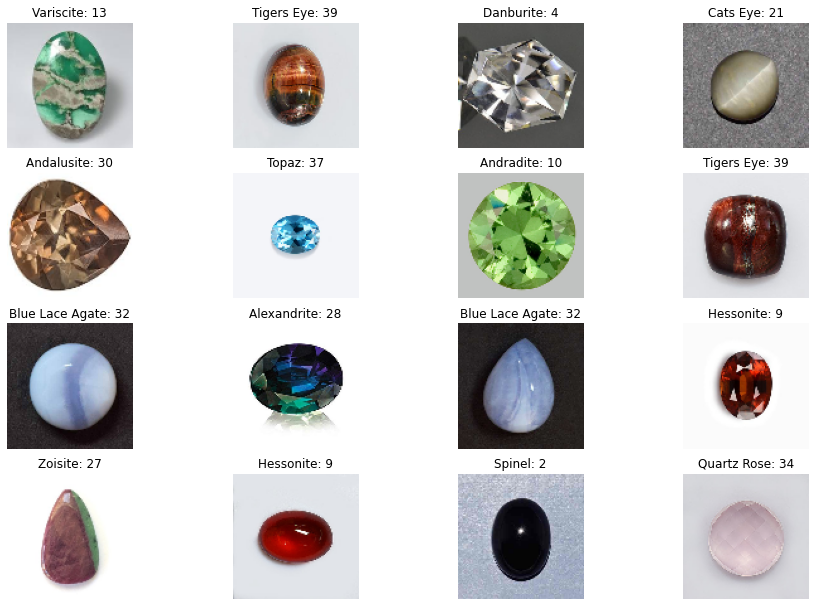

In [13]:
dim = 4

f, ax = plt.subplots(dim, dim)
f.subplots_adjust(0, 0, 2, 2)

for i in range(0, dim):
  for j in range(0, dim):
    round_number = randint(0, len(train_img))
    cl = train_label[round_number]
    ax[i, j].imshow(train_img[round_number])
    ax[i, j].set_title(names[cl] + ': ' + str(cl))
    ax[i, j].axis('off')

## Split image for train and validation sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_img, train_label, 
                                                    shuffle=True, test_size=0.2,
                                                    random_state=42)

print("Shape of X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (1042, 100, 100, 3), y_train: (1042,)
Shape of X_test: (261, 100, 100, 3), y_test: (261,)


## Creating models

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(100,100,3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(gems_map)))
model.add(Activation('softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Data Augmentations

In [19]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                                   horizontal_flip=True,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator()

In [20]:
batch_size = 64

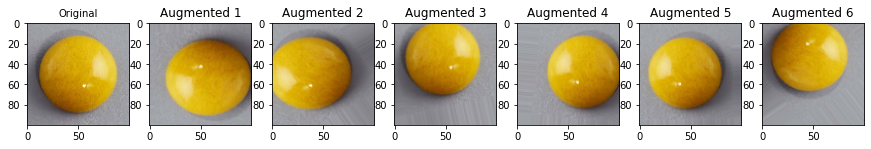

In [21]:
n = randint(0, len(X_train))
samples = np.expand_dims(X_train[n], 0)
iterations = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15,10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title("Original", fontsize=10)

for i in range(1, cols):
  batch = iterations.next()
  image = batch[0].astype('uint32')
  ax[i].set_title("Augmented {}".format(i), fontsize=12)
  ax[i].imshow(image, cmap='gray')

In [22]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = test_datagen.flow(X_test, y_test, batch_size=batch_size)

In [23]:
epochs = 100
iterations_per_epoch = len(X_train) // batch_size
test_per_epochs = len(X_test) // batch_size

## Training the model

In [24]:
history = model.fit(train_gen,
                    steps_per_epoch=iterations_per_epoch,
                    epochs=epochs,
                    validation_data=test_gen,
                    validation_steps=test_per_epochs,
                    verbose=1)

Epoch 1/100
16/16 [==============================] - 33s 198ms/step - loss: 6.4102 - accuracy: 0.0419 - val_loss: 3.5947 - val_accuracy: 0.0625
Epoch 2/100
16/16 [==============================] - 3s 183ms/step - loss: 3.5519 - accuracy: 0.0746 - val_loss: 3.3795 - val_accuracy: 0.1484
Epoch 3/100
16/16 [==============================] - 3s 180ms/step - loss: 3.3084 - accuracy: 0.1258 - val_loss: 2.9365 - val_accuracy: 0.2188
Epoch 4/100
16/16 [==============================] - 3s 179ms/step - loss: 2.8207 - accuracy: 0.2096 - val_loss: 2.3803 - val_accuracy: 0.3164
Epoch 5/100
16/16 [==============================] - 3s 186ms/step - loss: 2.6005 - accuracy: 0.2546 - val_loss: 2.0353 - val_accuracy: 0.4141
Epoch 6/100
16/16 [==============================] - 3s 183ms/step - loss: 2.2405 - accuracy: 0.3303 - val_loss: 1.6950 - val_accuracy: 0.4922
Epoch 7/100
16/16 [==============================] - 3s 191ms/step - loss: 1.9069 - accuracy: 0.3978 - val_loss: 1.4139 - val_accuracy: 0.543

## Plotting the results

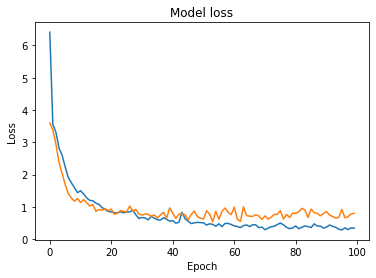

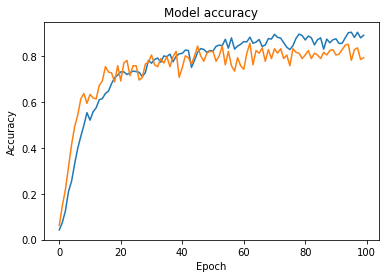

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model loss")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy")
plt.show()

## Read images and labels from test data

In [25]:
## Function to read images and labels from test data

def read_test_images():
  images, labels = [], []
  for root, dirs, files in os.walk('gemstones/test/'):
    f = os.path.basename(root)
    for file in files:
      labels.append(f)
      try:
        image = cv2.imread(root + '/' + file)
        image = cv2.resize(image, (int(img_width), int(img_height)))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
      except Exception as e:
        print(e)

  images = np.array(images)
  return (images, labels)

In [26]:
test_image, test_label = read_test_images()
test_label = get_class_index(test_label)

## Make predictions on random images from test set

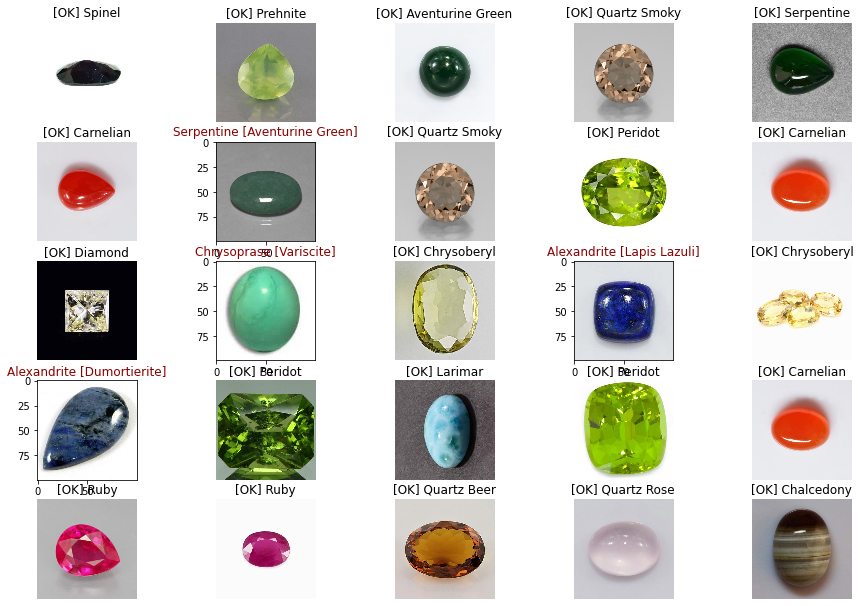

In [44]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,2,2)
for i in range(0, 5, 1):
  for j in range(0,5,1):
    round_number = randint(0,len(test_image))
    predict_image = np.array([test_image[round_number]])
    predict_class = model.predict(predict_image)[0]
    predict_proba = model.predict(predict_image).reshape(40)

    act = names[test_label[round_number]]

    ax[i, j].imshow(test_image[round_number])
    ax[i, j].imshow(predict_image[0])

    if names[np.argmax(predict_class)] != names[test_label[round_number]]:
      t = '{} [{}]'.format(names[np.argmax(predict_class)], names[test_label[round_number]])
      ax[i, j].set_title(t, fontdict={'color':'darkred'})
    else:
      t = '[OK] {}'.format(names[np.argmax(predict_class)])
      ax[i, j].set_title(t)
      ax[i, j].axis('off')

## Saving Models

In [45]:
model.save('model_save/gemstone.tf')

INFO:tensorflow:Assets written to: model_save/gemstone.tf/assets
